<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**: Nguyễn Hữu Bền

**MSSV**: 22120029


---

# Thư viện

In [105]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import ast
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sử dụng data đã được xử lý

In [154]:
# Đọc file csv
data = pd.read_csv('../data/processed_data.csv', index_col=0)

# Chuyển đổi object thành list
data["do_phan_giai_cam_truoc"] = data["do_phan_giai_cam_truoc"].apply(ast.literal_eval)
data["do_phan_giai_cam_sau"] = data["do_phan_giai_cam_sau"].apply(ast.literal_eval)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8855 entries, 0 to 8854
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     8855 non-null   object 
 1   loai_dien_thoai         8855 non-null   object 
 2   thoi_gian_bao_hanh      8855 non-null   float64
 3   danh_gia                8855 non-null   float64
 4   so_luong_binh_luan      8855 non-null   int64  
 5   duong_dan               8855 non-null   object 
 6   mau_sac                 8576 non-null   object 
 7   gia_moi                 7347 non-null   float64
 8   gia_cu                  5158 non-null   float64
 9   he_dieu_hanh            8855 non-null   object 
 10  cpu                     8840 non-null   object 
 11  ram                     8838 non-null   float64
 12  bo_nho_trong            8536 non-null   float64
 13  dung_luong_pin          8655 non-null   float64
 14  thiet_ke                8739 non-null   objec

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
0,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh Đậm,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
1,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh Đậm,1950000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,128.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
2,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh bạc hà,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
3,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh bạc hà,1950000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,128.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
4,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Tím,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]


# Câu hỏi: Trong các thông số kỹ thuật của một chiếc điện thoại, những thông số nào thường có ảnh hưởng lớn nhất đến giá bán?

## Mục đích

**Thông số kỹ thuật** gồm những thông tin chính: màn hình (kích thước, tần số quét, loại màn hình), camera, chip xử lý (CPU), RAM và bộ nhớ, Pin và sạc, hệ điều hành, Thiết kế và chất liệu, ...

Các mục đích chính của việc trả lời câu hỏi:
- **Đối với nhà sản xuất**: Phân tích các yếu tố ảnh hưởng đến giá giúp họ định giá sản phẩm hợp lý, tối ưu hóa thiết kế để tăng sức cạnh tranh trên thị trường.
- **Đối với khách hàng**: Khi hiểu rõ nhu cầu của mình, khách hàng có thể xác định được chiếc điện thoại mong muốn thuộc khoảng giá nào và đánh giá xem số tiền bỏ ra có tương xứng với các tính năng, thông số kỹ thuật của sản phẩm hay không.
- **Đối với tư vấn viên**: Việc nắm rõ thông số kỹ thuật nào ảnh hưởng nhiều đến giá giúp tư vấn viên đưa ra lời khuyên chính xác, giúp khách hàng chọn được sản phẩm phù hợp nhất với yêu cầu của họ.

## Tiền xử lý

> Tạo một DataFrame mới để xử lý nhằm đảm bảo dữ liệu gốc không bị ảnh hưởng.

In [155]:
data_copy = data.dropna(subset=["gia_moi"]).copy()  # Tạo một copy df nhưng giá trị "gia_moi" không có Nan
data_copy = data_copy[["gia_moi", "he_dieu_hanh", "cpu", "ram", "bo_nho_trong", "dung_luong_pin", "loai_man_hinh", "kich_thuoc_man_hinh", "tan_so_quet", "do_sang_man_hinh", "so_the_sim", "loai_pin", "cong_suat_sac", "do_phan_giai_cam_truoc", "do_phan_giai_cam_sau", "thiet_ke"]]  # Chỉ lấy những thuộc tính thông số kỹ thuật
data_copy.columns = ["Giá", "Hệ điều hành", "CPU", "RAM", "Bộ nhớ trong", "Dung lượng PIN", "Loại màn hình", "Kích thước màn hình", "Tần số quét", "Độ sáng màn hình", "Số thẻ SIM", "Loại PIN", "Công suất sạc", "Độ phân giải camera trước", "Độ phân giải camera sau", "Thiết kế"]   # Đặt lại tên cột
data_copy.info() # Đặt lại tên cột

<class 'pandas.core.frame.DataFrame'>
Index: 7347 entries, 0 to 8800
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Giá                        7347 non-null   float64
 1   Hệ điều hành               7347 non-null   object 
 2   CPU                        7346 non-null   object 
 3   RAM                        7345 non-null   float64
 4   Bộ nhớ trong               7226 non-null   float64
 5   Dung lượng PIN             7176 non-null   float64
 6   Loại màn hình              7175 non-null   object 
 7   Kích thước màn hình        7195 non-null   float64
 8   Tần số quét                5870 non-null   float64
 9   Độ sáng màn hình           4970 non-null   float64
 10  Số thẻ SIM                 7347 non-null   int64  
 11  Loại PIN                   5527 non-null   object 
 12  Công suất sạc              7079 non-null   float64
 13  Độ phân giải camera trước  7347 non-null   object 
 1

> Chuyển đổi các cột có kiểu dữ liệu `category` sang dạng `numerical` để thuận tiện cho việc phân tích, bắt đầu với thuộc tính `Hệ điều hành`.

In [156]:
# Tạo DataFrame mới để xử lý cột "Hệ điều hành" (không có nan)
df = pd.DataFrame({"Hệ điều hành": data_copy["Hệ điều hành"].astype(str).copy()})

# Tách cột "Hệ điều hành" thành hai cột Brand và Version
df[["Brand", "Version"]] = df["Hệ điều hành"].str.split(" ", n=1, expand=True)

# Chuyển đổi Version thành số thực
df["Version"] = (
    df["Version"]
    .str.extract(r"(\d+.\d+|\d+)")[0]
    .astype(float)
)

# Tính giá trị số hóa của "Hệ điều hành"
data_copy["Hệ điều hành"] = df["Version"] + df["Brand"].apply(lambda x: 0.5 if x == "Android" else 0)

# Lí do: Android thường dễ sử dụng hơn iOS nên ta gán giá trị 0.5 cho Android và 0 cho iOS

> Xử lý dữ liệu cho thuộc tính `CPU`.

In [157]:
# Tạo một df mới chứa các thông số của CPU (có Nan)
df = pd.DataFrame({"CPU": data_copy["CPU"].astype(str).copy()})

# Tạo cột Process chứa giá trị nm của CPU
df['Process'] = df['CPU'].str.extract(r'\((\d+)\s*nm\)')[0].astype(float)   # Trích xuất Process
df['Process'] = df['Process'].fillna(df['Process'].mean())  # Fillna với giá trị trung bình

# Hàm tính Clock_Speed
def calculate_clock_speed(row):
    if isinstance(row, str):
        core_info = re.findall(r'(\d+)x([\d.]+)\s*GHz', row)
        return sum(int(cores) * float(speed) for cores, speed in core_info)
    return 0

# Tạo cột Clock_Speed chứa giá trị Clock_Speed của CPU
df['Clock_Speed'] = df['CPU'].apply(calculate_clock_speed)  # Tính Clock_Speed
df['Clock_Speed'] = df['Clock_Speed'].replace(0, df['Clock_Speed'].mean())  # Fill các giá trị 0 thành giá trị mean

# Số hóa thuộc tính CPU
data_copy['CPU'] = df['Clock_Speed'] / df['Process']

# Lý do: Tất cả các chip đều có những thuộc tính chung như: số nhân, tốc độ xử lý, và số tiến trình sản xuất, do đó chúng có thể được số hóa để tiện phân tích.  
# - Tiến trình sản xuất (Process): Giá trị càng nhỏ thì chip càng cao cấp.  
# - Tốc độ xử lý (Clock Speed): Giá trị càng lớn thì hiệu năng càng cao.  

> Xử lý dữ liệu cho thuộc tính `Loại màn hình`.

In [158]:
# Tính giá trị số hóa cho 'Loại màn hình' (có Nan)
freq_encoding = data_copy['Loại màn hình'].value_counts().to_dict()
data_copy['Loại màn hình'] = data_copy['Loại màn hình'].map(freq_encoding)

# Lý do: AMOLED có giá trị cao hơn OLED, trong khi LCD có giá trị thấp hơn cả hai loại màn hình này.

> Xử lý dữ liệu cho thuộc tính `Loại PIN`.

In [159]:
# Tính giá trị số hóa cho 'Loại Pin' (có Nan)
battery_value = {'Li-Po': 2, 'Li-Ion': 1, 'Si/C': 3}
data_copy['Loại PIN'] = data_copy['Loại PIN'].map(battery_value)

# Lí do: Loại pin Li-Po thường có tuổi thọ cao hơn so với Li-Ion, còn Si/C là loại pin mới nhất và có tuổi thọ cao nhất.

> Xử lý dữ liệu cho thuộc tính `Độ phân giải camera trước`, `Độ phân giải camera sau`.

In [160]:
# Hàm số hóa camera
def encode_camera_resolution(camera_list):
    if not camera_list:  # Nếu danh sách trống
        return 0
    total_resolution = sum(camera_list)  # Tổng độ phân giải
    additional_value = 1 / len(camera_list)  # Giá trị cộng thêm
    return total_resolution + additional_value

# Tính giá trị số hóa cho 'Độ phân giải camera trước' và 'Độ phân giải camera sau' (không có Nan)
data_copy['Độ phân giải camera trước'] = data_copy['Độ phân giải camera trước'].apply(encode_camera_resolution)
data_copy['Độ phân giải camera sau'] = data_copy['Độ phân giải camera sau'].apply(encode_camera_resolution)

# Lí do: Độ phân giải càng cao thì chất lượng ảnh càng tốt, do đó ta có thể số hóa các giá trị này để dễ dàng phân tích.
# Một camera có độ phân giải cao có giá trị hơn tổng độ phân giải của các camera có độ phân giải thấp.

> Xử lý dữ liệu cho thuộc tính `Thiết kế`.

In [161]:
# Tạo một df mới chứa các thông số của "Thiết kế" (có Nan)
df = pd.DataFrame({"Thiết kế": data_copy["Thiết kế"].astype(str).copy()})
df["Thiết kế"] = df["Thiết kế"].str.lower()  # Chuyển tất cả thành chữ thường

# Tính số gái trị của "Thiết kế"
design_value = df["Thiết kế"].value_counts().to_dict()

# Xóa cột "Thiết kế"
data_copy = data_copy.drop(columns=["Thiết kế"])

# Lí do: Thiết kế của điện thoại bao gồm các yếu tố như vật liệu, khung, họa tiết, kiểu dáng, và các tính năng bổ trợ đặc biệt, v.v.
# Kiểu dữ liệu này không tuân thủ theo một quy tắc cụ thể nào, do đó ta không thể số hóa nó một cách chính xác.
# Vì vậy, ta sẽ xóa cột này và việc đánh giá thiết kế sẽ được thực hiện sau.

> Xử lý các giá trị bị thiếu trong tất cả các cột để đảm bảo dữ liệu đầy đủ và nhất quán.

In [162]:
# Xử lý cột "SIM"
data_copy['Số thẻ SIM'] = data_copy['Số thẻ SIM'].fillna(data_copy['Số thẻ SIM'].min()) # Fillna với giá trị nhỏ nhất

# Xử lý tẩt cả các cột còn lại với giá trị mean
data_copy = data_copy.fillna(data_copy.mean())

> Kiểm tra lại tính chính xác và đầy đủ của thông tin dữ liệu trước khi bắt đầu phân tích.

In [163]:
# In ra thông tin của data_copy
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7347 entries, 0 to 8800
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Giá                        7347 non-null   float64
 1   Hệ điều hành               7347 non-null   float64
 2   CPU                        7347 non-null   float64
 3   RAM                        7347 non-null   float64
 4   Bộ nhớ trong               7347 non-null   float64
 5   Dung lượng PIN             7347 non-null   float64
 6   Loại màn hình              7347 non-null   float64
 7   Kích thước màn hình        7347 non-null   float64
 8   Tần số quét                7347 non-null   float64
 9   Độ sáng màn hình           7347 non-null   float64
 10  Số thẻ SIM                 7347 non-null   int64  
 11  Loại PIN                   7347 non-null   float64
 12  Công suất sạc              7347 non-null   float64
 13  Độ phân giải camera trước  7347 non-null   float64
 1

## Phân tích và Trực quan hóa

> Phân tích về thuộc tính `Thiết kế`.

In [170]:
# In ra các giá trị của "Thiết kế"
list(design_value.items())[:20]

[('thanh + cảm ứng', 1238),
 ('khung kim loại + 2 mặt kính', 133),
 ('gaming phone', 114),
 ('thanh, cảm ứng', 95),
 ('khung nhựa, mặt lưng nhựa', 82),
 ('nan', 62),
 ('khung nhôm vuông vức\r\nkính sau corning-made\r\nkính trước ceramic shield\r\nthiết kế màn hình dynamic island\r\nkháng nước, bụi ip68',
  60),
 ('khung nhôm vuông vức\r\nkính trước ceramic shield (2024)\r\nkính sau corning-made\r\nkháng nước, bụi ip68',
  60),
 ('khung kim loại + mặt lưng kính', 58),
 ('cảm ứng', 57),
 ('màn hình tràn viền với dynamic island\r\nkhung viền titan (grade 5)\r\nmặt lưng kính corning-made\r\nkính trước ceramic shield\r\nkháng nước, bụi ip68',
  52),
 ('khung titanium (grade 5)\r\nmặt kính sau corning-made\r\nmặt kính trước ceramic shield (2024)\r\nkháng nước, bụi ip68',
  52),
 ('khung thép vuông vức\r\nkính sau corning-made glass\r\nkính trước ceramic shield glass\r\nkháng nước, bụi ip68',
  47),
 ('khung kim loại + hai mặt kính', 42),
 ('hỗ trợ bút s pen tích hợp (tích hợp bluetooth, gia 

Nhận xét một số yếu tố trong thiết kế có thể ảnh hưởng đến giá của một chiếc điện thoại.

- **Chất liệu khung và mặt lưng**:
   - **Khung kim loại** (nhôm, titan, thép) và **mặt lưng kính/gốm/da** cao cấp hơn nhựa, tăng giá trị.  
   - **Kính Gorilla Victus** tốt hơn các loại kính thông thường.  

- **Khả năng kháng nước/bụi**:
   - Các chuẩn **IP68/IP69** nâng giá hơn so với IP53/IP54.  

- **Màn hình**:
   - **AMOLED** > OLED > LCD.  
   - Màn hình cong và kính cường lực cao cấp tăng giá trị.  

- **Tính năng bổ trợ**:
   - Hỗ trợ bút cảm ứng, trigger gaming, đèn LED RGB, hoặc các thiết kế đặc biệt (điện thoại gập, gaming phone).  

- **Thiết kế**:
   - Thiết kế nguyên khối, hợp tác thương hiệu, hoặc đạt tiêu chuẩn quân đội tăng giá trị.

> Phân tích mối tương quan giữa các thuộc tính đã số hóa và giá để xác định thông số kỹ thuật ảnh hưởng lớn nhất đến giá.

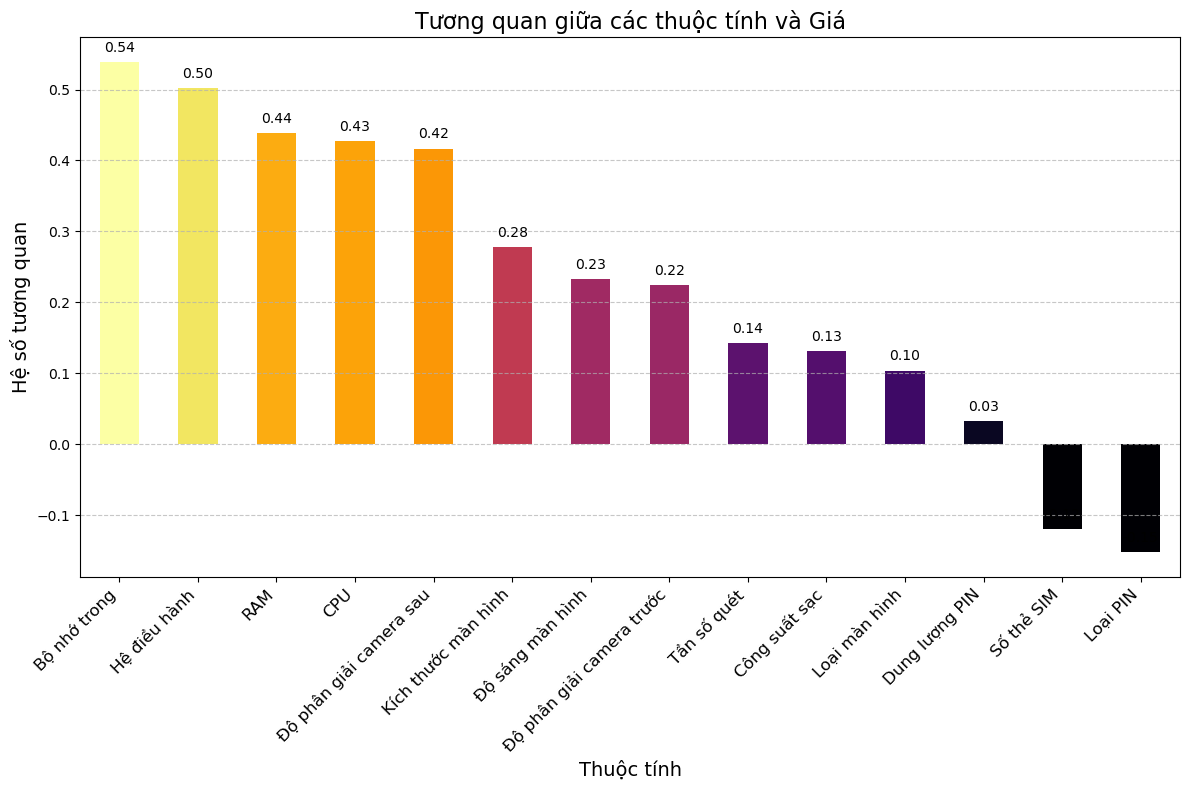

In [169]:
# Tính tươmg quan giữa các thuộc tính và giá
correlation_with_price = data_copy.corr()['Giá'].sort_values(ascending=False)
correlation_data = correlation_with_price[1:].reset_index()
correlation_data.columns = ['Thuộc tính', 'Tương quan']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
bars = correlation_with_price[1:].plot(
    kind='bar', 
    color=plt.cm.inferno(correlation_with_price[1:].values / max(correlation_with_price[1:].values))
)

# Thêm giá trị trên cột
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.01, 
        f'{bar.get_height():.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Thêm tiêu đề và nhãn
plt.title("Tương quan giữa các thuộc tính và Giá", fontsize=16)
plt.xlabel("Thuộc tính", fontsize=14)
plt.ylabel("Hệ số tương quan", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

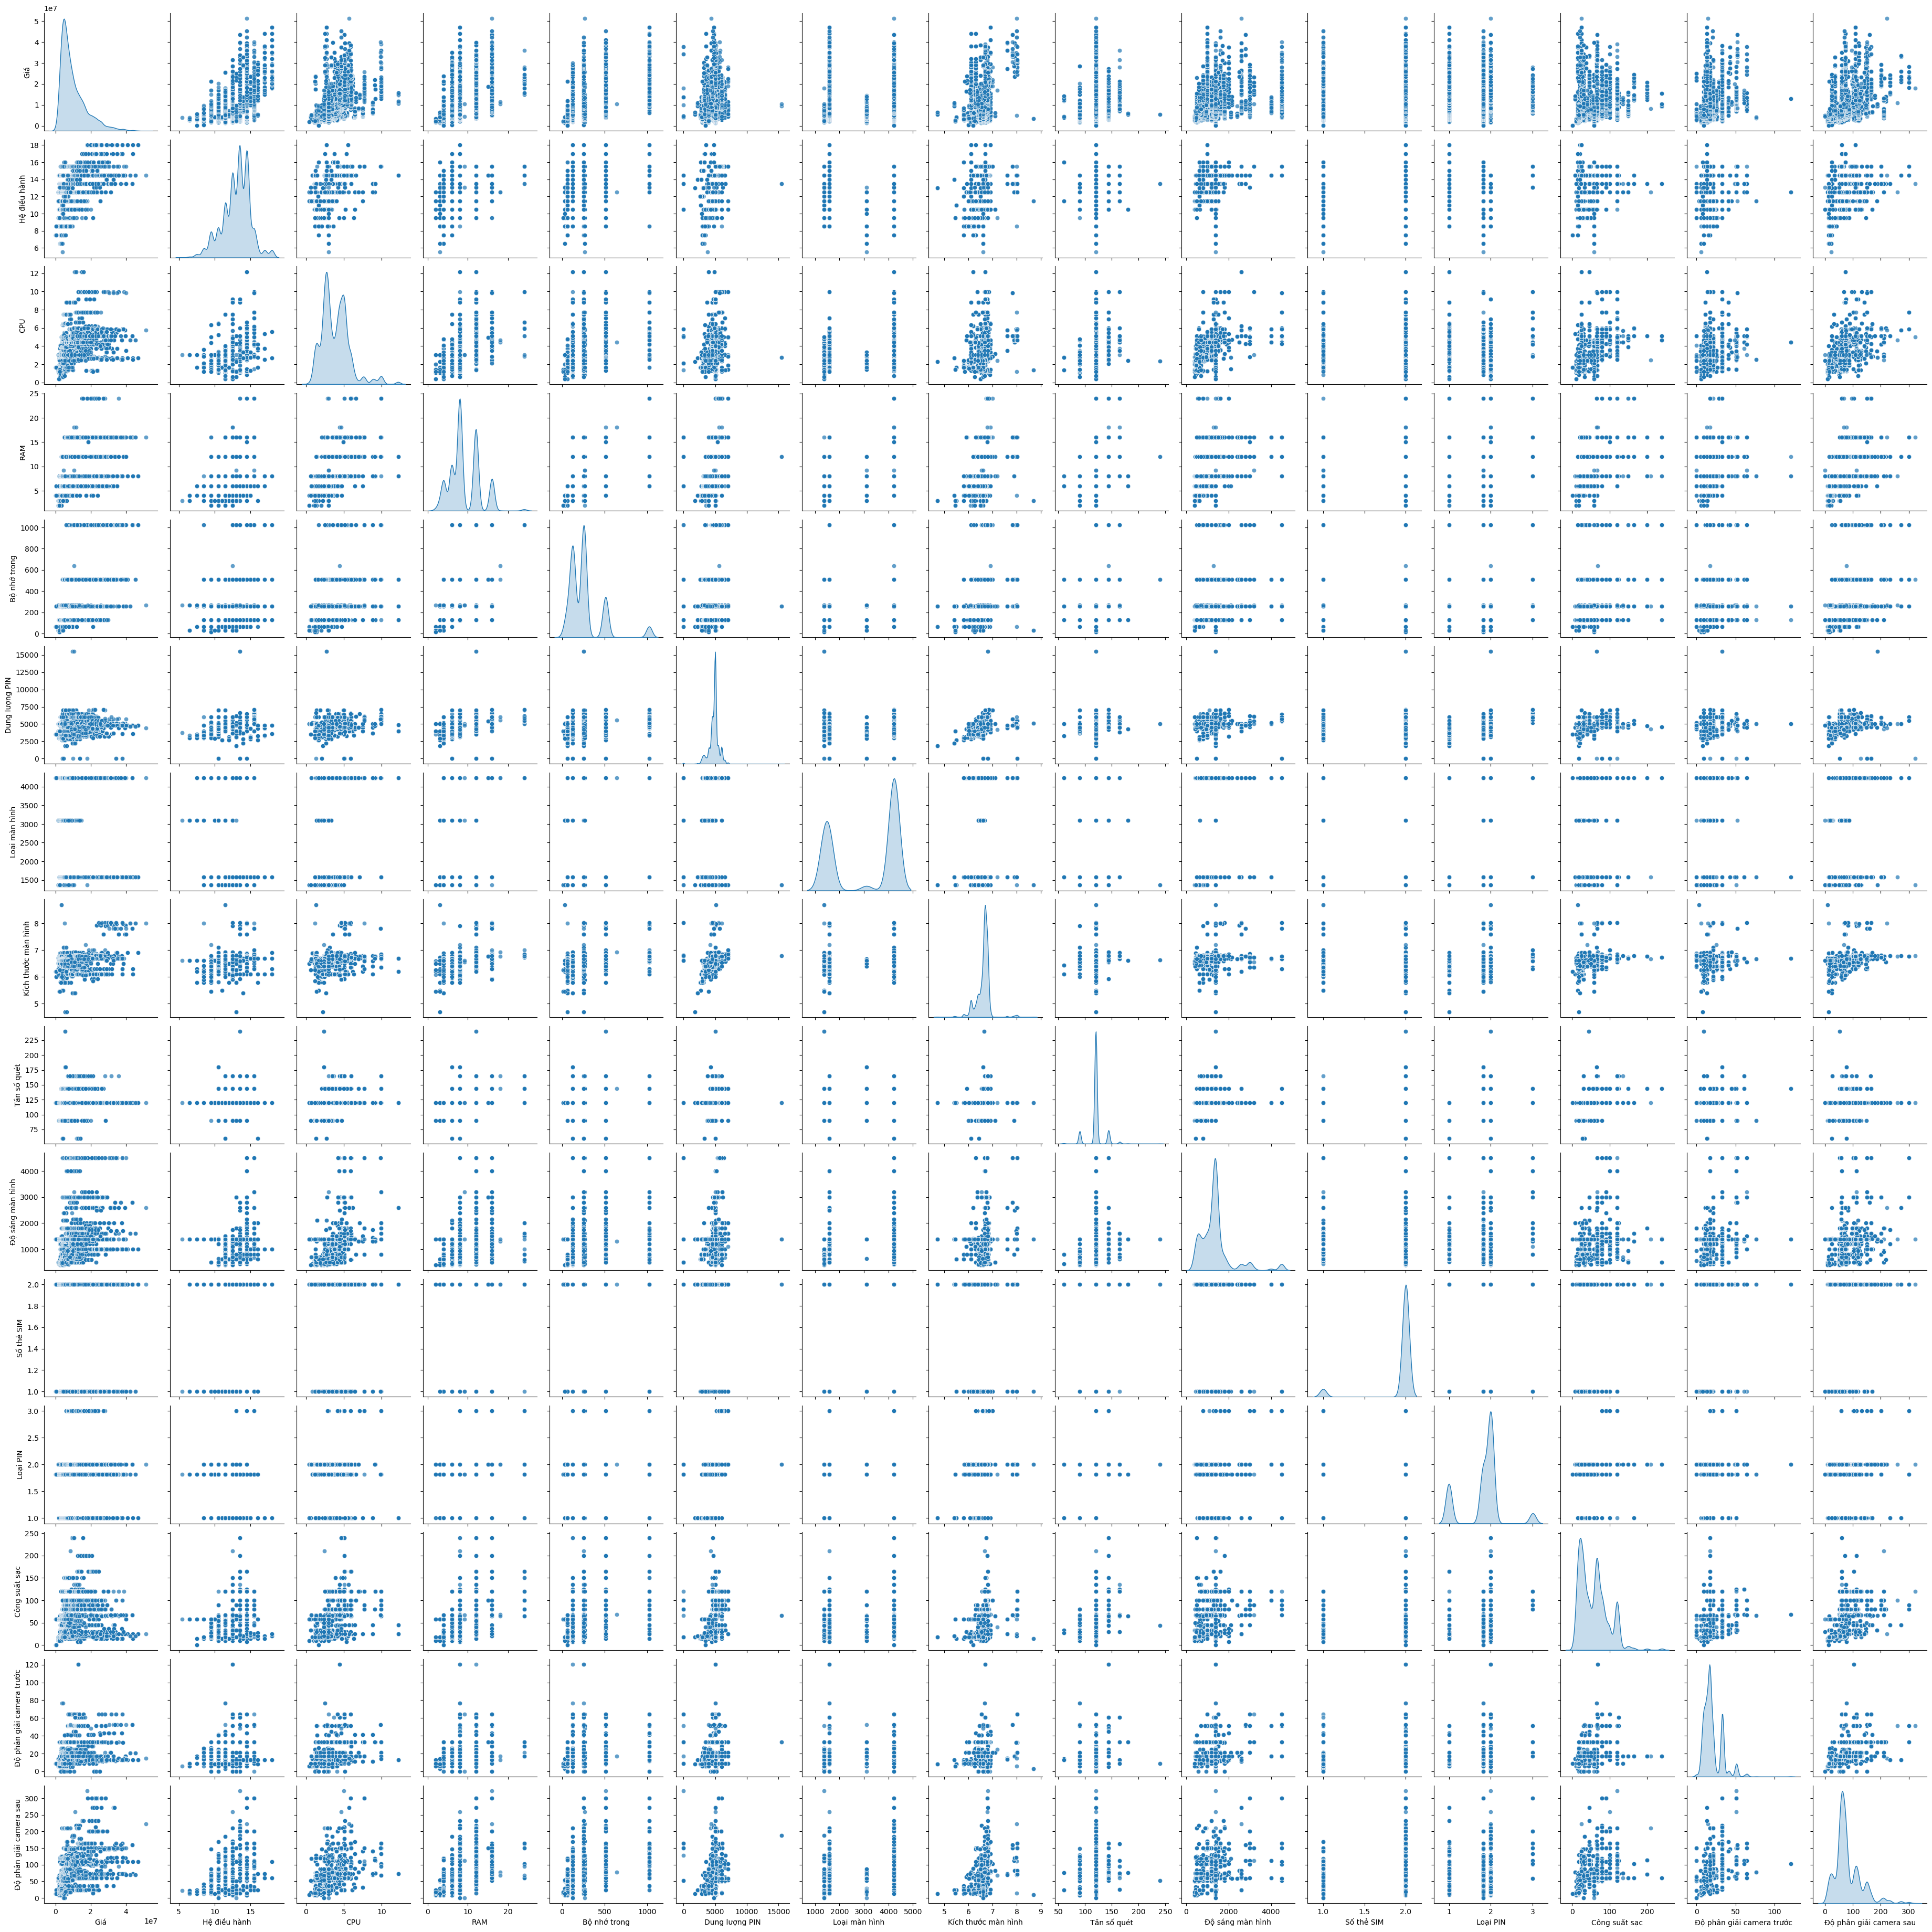

In [108]:
# Vẽ biểu đồ pairplot
sns.pairplot(data_copy, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

## Nhận xét

- **Bộ nhớ trong, Hệ điều hành, RAM, và CPU** là những thông số kỹ thuật có tương quan mạnh nhất với giá của một chiếc điện thoại.  

    - **Bộ nhớ trong**: Đáp ứng nhu cầu lưu trữ dữ liệu ngày càng lớn.  
    - **Hệ điều hành**: Ảnh hưởng bởi phiên bản và tối ưu hóa.  
    - **RAM**: Tăng khả năng xử lý đa nhiệm.  
    - **CPU**: Quyết định hiệu năng, đặc biệt ở dòng flagship.  

- **Độ phân giải camera sau và kích thước màn hình** có mức tương quan trung bình.  

   - **Camera sau**: Quan trọng với người dùng thích chụp ảnh.  
   - **Màn hình**: Kích thước lớn cải thiện trải nghiệm giải trí.

- **Các yếu tố khác như Công suất sạc, Loại màn hình, Tần số quét** có ảnh hưởng nhỏ hơn nhưng vẫn đáng kể.  
   - **Công suất sạc**: Tốc độ sạc nhanh ngày càng phổ biến.
   - **Loại màn hình và tần số quét**: Những yếu tố này quan trọng với các dòng điện thoại gaming hoặc giải trí cao cấp.

- **Dung lượng PIN, Số thẻ SIM, và Loại PIN** có tương quan thấp với giá.  
   - Các yếu tố này không có sự khác biệt quá lớn giữa các phân khúc giá.
   - **PIN** và **số thẻ SIM** có thể không phải yếu tố quyết định giá điện thoại, hoặc do dữ liệu chưa đủ ý nghĩa hoặc lỗi xử lý dẫn đến phân tích chưa chính xác.

### Kết luận:
Những thông số ảnh hưởng mạnh nhất đến giá của một chiếc điện thoại là **Bộ nhớ trong, Hệ điều hành, RAM, và CPU**. Các yếu tố khác như **camera và màn hình** cũng đóng vai trò bổ trợ.

# Câu hỏi: Kiểu thiết kế điện thoại nào phổ biến nhất hiện nay, dựa trên các kiểu thiết kế của các mẫu điện thoại hiện có trong cửa hàng?

## Mục đích

**Lý do:** Các mẫu thiết kế xuất hiện phổ biến trên các điện thoại phần nào phản ánh được thị hiếu và nhu cầu của người mua. Theo quy luật cung - cầu, việc phân tích các mẫu thiết kế thịnh hành mang lại nhiều giá trị và ý nghĩa thực tiễn.

**Mục đích chính:**
- **Đối với nhà sản xuất**: Hiểu được các kiểu thiết kế điện thoại nào đang được ưa chuộng, từ đó tối ưu hóa dây chuyền sản xuất và tập trung phát triển các sản phẩm phù hợp với thị hiếu thị trường.  
- **Đối với người tiêu dùng**: Cung cấp thông tin về các kiểu thiết kế phổ biến, giúp họ lựa chọn sản phẩm đáp ứng nhu cầu cá nhân và bắt kịp xu hướng.  
- **Đối với các chủ cửa hàng**: Nắm bắt xu hướng thị trường để điều chỉnh kế hoạch nhập hàng, quản lý tồn kho hiệu quả và xây dựng chiến lược kinh doanh phù hợp.  
- **Đối với các bên khác**: Như nhà nghiên cứu thị trường, nhà đầu tư – thông tin này hỗ trợ việc phân tích xu hướng tiêu dùng, xây dựng chiến lược tiếp thị và đưa ra quyết định đầu tư chính xác.  

## Tiền xử lý

In [230]:
import re

# Tạo ra một DataFrame mới chứa các thuộc tính 'Thiết kế'
design_df = pd.DataFrame({'Thiết kế': data['thiet_ke'].astype(str).copy()})

# Xử lý cột 'Thiết kế'
design_df['Thiết kế'] = design_df['Thiết kế'].dropna().str.replace(' + ', ', ', regex=False)
design_df['Thiết kế'] = design_df['Thiết kế'].str.replace('; ', ', ', regex=False)
design_df['Thiết kế'] = design_df['Thiết kế'].str.replace('\r\n', ', ').str.split(', ')
design_df['Thiết kế'] = design_df['Thiết kế'].apply(lambda x: [i.lower() for i in x])
design_df['Thiết kế'] = design_df['Thiết kế'].apply(lambda x: [i.strip() for i in x])
design_df['Thiết kế'] = design_df['Thiết kế'].drop('nan', errors='ignore')

design = design_df.explode('Thiết kế')['Thiết kế']

design.sample(100)

7863        hai mặt kính phẳng gorilla glass victus+
6205                             mặt lưng nhựa phẳng
3242                                  khung kim loại
3629                                        bụi ip68
4145                             kháng nước nhẹ ipx4
2949                                        bụi ip65
876                                         bụi ip54
4118                                      khung nhôm
3272                                   mặt lưng kính
1291                              khung nhôm bo cong
4751                                         cảm ứng
2089                                      kháng nước
4794                                   mặt lưng nhựa
422                                         bụi ip68
580                             khung nhôm vuông vức
3990                                        bụi ip68
2254                       mặt lưng da tổng hợp/kính
1398                                         cảm ứng
2023                            khung nhựa vuô

In [239]:
import re

def convert_string(input_str):
    input_str = re.sub(r'\(.*?\)', '', input_str).strip()
    input_str = re.sub(r'\(.*?\)|\(', '', input_str).strip()
    
    if 'hai mặt kính' in input_str or '2 mặt kính' in input_str or ('2' in input_str and 'kính' in input_str):
        return '2 mặt kính'
    
    if 'khung nhựa' in input_str or ('khung' in input_str and 'nhựa' in input_str):
        if 'vuông vức' in input_str:
            return ['khung nhựa', 'vuông vức']
        elif 'bo cong' in input_str:
            return ['khung nhựa', 'bo cong']
        else:
            return 'khung nhựa' 
    elif 'khung nhôm' in input_str or 'nhôm' in input_str:
        if 'vuông vức' in input_str:
            return ['khung nhựa', 'vuông vức']
        elif 'bo cong' in input_str:
            return ['khung nhựa', 'bo cong']
        else: 
            return 'khung nhôm'
    elif 'titan' in input_str:
        return 'khung titan'
    elif 'khung kim loại' in input_str:
        if 'vuông vức' in input_str:
            return ['khung kim loại', 'vuông vức']
        elif 'bo cong' in input_str:
            return ['khung kim loại', 'bo cong']
    elif 'khung thép' in input_str:
        if 'vuông vức' in input_str:
            return ['khung thép', 'vuông vức']
        elif 'bo cong' in input_str:
            return ['khung thép', 'bo cong']
    
    if 'ceramic shield' in input_str:
        return 'ceramic shield'
    
    if 'corning-made' in input_str:
        return 'corning-made glass'
    
    if 'gorilla' in input_str:
        return 'gorilla glass'

    if 'cảm biến vân tay' in input_str or 'cảm biến' in input_str or 'vân tay' in input_str:
        if 'trong màn hình' in input_str:
            return 'vân tay (trong)'
        elif 'dưới màn hình' in input_str:
            return 'vân tay (dưới)'
        elif 'cạnh bên' in input_str:
            return 'vân tay (cạnh)'
        elif 'siêu âm dưới màn hình' in input_str:
            return 'vân tay (siêu âm)'
        return 'vân tay'
    
    if 'mặt lưng' in input_str:
        if 'nhựa' in input_str:
            return 'lưng nhựa'
        elif 'da' in input_str:
            return 'lưng da'
        else:
            return 'lưng kính'
    
    if 'mặt trước' in input_str:
        if 'cường lực' in input_str:
            return 'cường lực'
        elif 'kính' in input_str:
            return 'mặt trước kính' 
        elif 'nhựa' in input_str:
            return 'mặt trước nhựa'
        
    if 'game' in input_str or 'gaming' in input_str:
        return 'gaming phone'
    
    if 'chống' in input_str and 'nước' in input_str:
        return 'kháng nước'
    elif 'kháng nước' in input_str:
        return 'kháng nước'
    elif 'kháng bụi' in input_str:
        return 'kháng bụi'
    
    if 'màu sắc' in input_str:
        return 'màu sắc mới mẻ'
        
    if 'quân đội' in input_str or 'độ bền cao' in input_str:
        return 'độ bền chuẩn quân đội'
    
    if 'gập' in input_str:
        return 'gập'
    
    if 'màn hình' in input_str:
        if 'đục lỗ' in input_str:
            return 'MH đục lỗ'
        elif 'giọt nước' in input_str:
            return 'MH giọt nước'
        elif 'cong' in input_str:
            return 'MH cong'
        else:
            return 'MH ' + re.sub(r'màn hình', '', input_str).strip()

    if 'nguyên khối' in input_str:
        return 'nguyên khối'
    elif 'vuông vức' in input_str:
        return 'vuông vức'
    elif 'bo cong' in input_str:
        return 'bo cong'
    
    if 'thiết kế' in input_str:
        return 'TK ' + re.sub(r'thiết kế', '', input_str).strip()
    
    if 'quạt' in input_str:
        return 'quạt tản nhiệt'
    
    if 'bút' in input_str:
        return 'bút cảm ứng'
    
    if 'khuôn mặt' in input_str:
        return 'mở khóa khuôn mặt'
    
    if 'ger cảm ứng' in input_str:
        return 'trigger cảm ứng'
    
    if 'nhiệt độ' in input_str:
        return 'chịu nhiệt tốt'
    
    if 'con quay' in input_str:
        return 'con quay hồi chuyển'
    

    ip_match = re.findall(r'ip\d{2,3}', input_str.lower())  # Find patterns like "ip68", "ip54"
    water_related = ['nước', 'kháng nước']
    dust_related = ['bụi']
    result = []
    if ip_match:
        result.extend(ip_match)
    if any(dust in input_str for dust in dust_related):
        result.append('kháng bụi')
    if any(water in input_str for water in water_related):
        result.append('kháng nước')
    if result:
        return result
    return input_str

design = design.apply(convert_string)

design = design.explode()

# Xóa phần tử có kiểu dữ liệu là 'nan'
design = design[design != 'nan']

# In ra các giá trị của 'Thiết kế'
design_counts = design.value_counts().reset_index()

design_counts.columns = ['Thiết kế', 'Số lần xuất hiện']

design_filtered = design_counts[design_counts['Số lần xuất hiện'] > 1]

In [241]:
len(design_filtered)

210

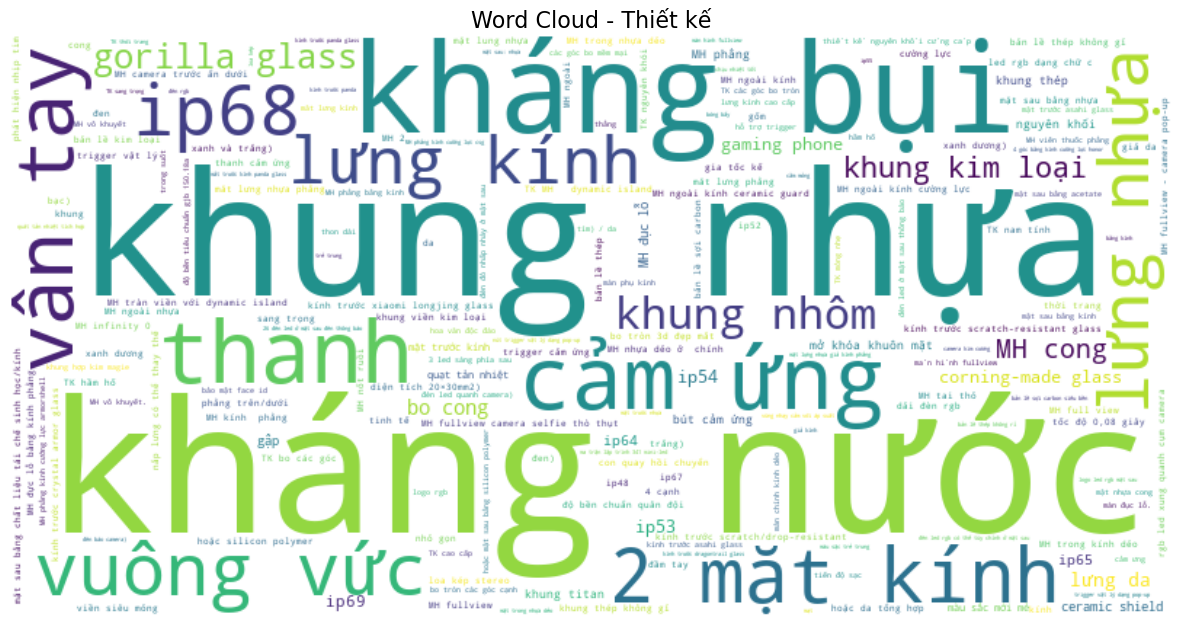

In [244]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Chuyển đổi DataFrame thành từ điển
design_dict = dict(zip(design_filtered['Thiết kế'], design_filtered['Số lần xuất hiện']))

# Tạo Word Cloud từ biến design_dict
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(design_dict)

# Hiển thị Word Cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt trục
plt.title("Word Cloud - Thiết kế", fontsize=16)
plt.show()

## Phân tích và trực quan hóa

## Nhận xét

- **Vật liệu phổ biến:** Nhựa và nhôm được sử dụng nhiều trong khung thiết kế (khung nhựa, khung nhôm), kết hợp với kính chịu lực cao (2 mặt kính, mặt lưng kính) để tăng độ bền và tính thẩm mỹ.  
- **Tính năng bền bỉ:** Các thiết kế thường chú trọng khả năng kháng nước, kháng bụi (ip68, ip53), phù hợp với điều kiện sử dụng khắc nghiệt.  
- **Thiết kế hiện đại:** Mặt lưng kính, màn hình cong, và các chi tiết bo cong hoặc vuông vức tạo sự cân đối, vừa mang tính thời trang vừa đảm bảo trải nghiệm cầm nắm thoải mái.  
- **Công nghệ tích hợp:** Cảm ứng và cảm biến vân tay (trong màn hình, cạnh bên, siêu âm) được tích hợp, nhấn mạnh tính tiện lợi và hiện đại trong sử dụng.  

=> Thiết kế tập trung vào sự kết hợp giữa tính năng bền vững, vật liệu cao cấp và công nghệ hiện đại, đáp ứng cả nhu cầu thẩm mỹ lẫn sử dụng thực tế.